### Module 10 – Part 01: Concept of Regression and Line Fitting

This notebook introduces Linear Regression in the simplest possible way using a tiny dataset.

We will:

1. Create a small example dataset (Study Hours → Marks)
2. Train a Linear Regression model
3. Visualize the scatter plot
4. Draw the best fit line
5. Predict marks for a new study hour value


This notebook is designed for absolute beginners.

### Step 1: Import Libraries

In [5]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression

### Step 2: Create a Simple Dataset

In [7]:
# Create a simple Dataset
hours = np.array([2, 4, 6, 8, 10]).reshape(-1, 1)
marks = np.array([55, 60, 70, 80, 88])
hours, marks

(array([[ 2],
        [ 4],
        [ 6],
        [ 8],
        [10]]),
 array([55, 60, 70, 80, 88]))

### Step 3: Train a Linear Regression Model

We use scikit-learn to train the model.
The model will automatically learn:

1. Slope (m)
2. Intercept (c)

In [8]:
# Train a Linear Regression Model
model = LinearRegression()
model.fit(hours, marks)

LinearRegression()

### Step 4: View the Learned Parameters

The regression line equation is:

( y = m x + c )
Where:

m = slope

c = intercept

In [10]:
# View the Learned Parameters
print("m: ", model.coef_[0])
print("c: ", model.intercept_

# marks = 4.3*hours + 44.8      

m:  4.300000000000002
c:  44.79999999999998


### Step 5: Visualize the Best Fit Line

Below:

Blue dots = actual student data

Red line = best fit line learned by the model

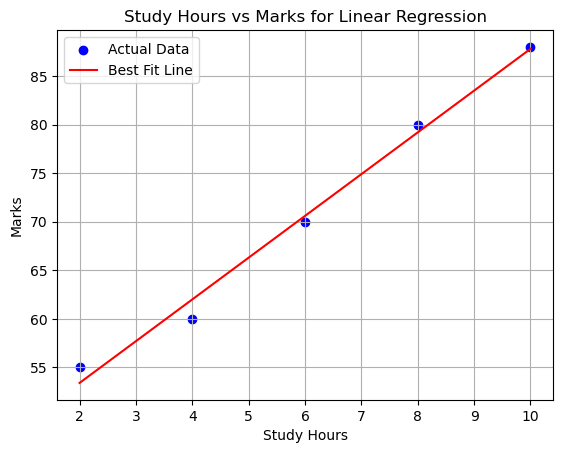

In [11]:
# Visualize the Best Fit Line
plt.scatter(hours, marks, color="blue", label = "Actual Data")
predicted_marks = model.predict(hours)
plt.plot(hours, predicted_marks, color='red', label="Best Fit Line")
plt.xlabel("Study Hours")
plt.ylabel("Marks")
plt.title("Study Hours vs Marks for Linear Regression")
plt.legend()
plt.grid(True)
plt.show()

### Step 6: Predict Marks for a New Student

Let’s predict marks for someone who studies 7 hours.

In [14]:
new_hours = np.array([[7]])
prediction = model.predict(new_hours)
print("Predicted Marks: ", prediction[0])

Predicted Marks:  74.89999999999999


### Summary

In this notebook, I learned:

1. What regression looks like in practice
2. How to create a simple dataset
3. How to train a Linear Regression model
4. How to plot the data and best fit line
5. How to make a prediction using the model

I am now ready for Module 10 – Part 02, where I explore the cost function and gradient descent.



### Module 10 – Part 01: Concept of Regression and Line Fitting

In this notebook, we will keep things simple and rely on existing libraries instead of writing gradient descent by hand.

We will:

1. Reuse the tiny study hours vs marks dataset
2. Fit a Linear Regression model using scikit-learn
3. Compute the Mean Squared Error (MSE) using a library function
4. Briefly show how a gradient-descent-based model (SGDRegressor) gives a similar result

The goal is to understand the idea of cost and gradient descent, without doing any manual math.

### Step 1: Import Libraries

In [1]:
# import library
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression, SGDRegressor 
from sklearn.metrics import mean_squared_error 

### Step 2: Create the Example Dataset

In [2]:
# Create a simple Dataset
hours = np.array([2, 4, 6, 8, 10]).reshape(-1, 1)
marks = np.array([55, 60, 70, 80, 88])
hours, marks

(array([[ 2],
        [ 4],
        [ 6],
        [ 8],
        [10]]),
 array([55, 60, 70, 80, 88]))

### Step 3: Fit a Linear Regression Model (Closed-Form Solver)

We start with the usual LinearRegression model from scikit-learn.

This model finds the best fit line using a direct mathematical solution under the hood.

In [3]:
#Fit a Linear Regression Model (Closed-Form Solver)
lin_reg = LinearRegression()
lin_reg.fit(hours, marks)
print("m: ", lin_reg.coef_[0])
print("C: ", lin_reg.intercept_)

m:  4.300000000000002
C:  44.79999999999998


### Step 4: Compute the Cost (Mean Squared Error) Using a Library

The Mean Squared Error (MSE) is our cost function for regression.

We do not compute it manually.

Instead, we use mean_squared_error from sklearn.metrics.

In [5]:
# Compute the Cost (Mean Square Error) using Library 
pred_marks = lin_reg.predict(hours) 
mse_lin = mean_squared_error(marks, pred_marks)
print("MSE for LinearRegression", mse_lin)

MSE for LinearRegression 1.5200000000000011


### Step 5: Visualize the Data and Best Fit Line

This helps connect the idea of low cost with a good visual fit.

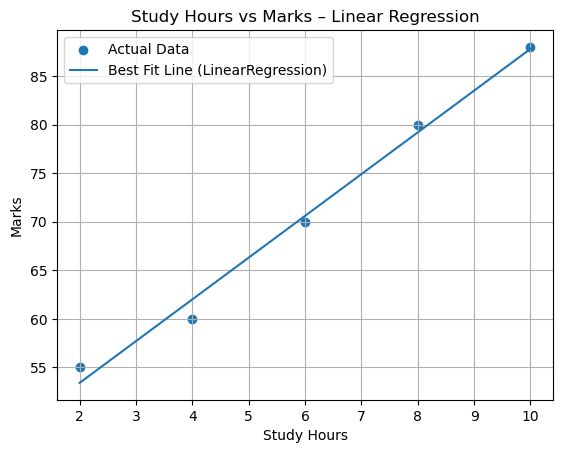

In [6]:
#Visualize the Data and Best Fit Line
plt.scatter(hours, marks, label="Actual Data")

plt.plot(hours, pred_marks, label="Best Fit Line (LinearRegression)")

plt.xlabel("Study Hours")
plt.ylabel("Marks")
plt.title("Study Hours vs Marks – Linear Regression")
plt.legend()
plt.grid(True)
plt.show()

### Step 6: Use a Gradient-Descent-Based Model – SGDRegressor

SGDRegressor is a regression model that uses Stochastic Gradient Descent (SGD) internally.
We will:

1. Fit SGDRegressor on the same data
2. Compare its slope, intercept, and MSE with LinearRegression

You can think of SGDRegressor as:

“Same goal (best line), but using gradient descent steps instead of a direct formula.”

In [11]:
#Use a Gradient-Descent-Based Model – SGDRegressor
sgd_reg = SGDRegressor(
    max_iter = 1000, 
    learning_rate = "invscaling",
    eta0 = 0.01, 
    random_state=42
)
sgd_reg.fit(hours, marks)
print("m: ", sgd_reg.coef_[0])
print("C: ", sgd_reg.intercept_)

pred_sgd = sgd_reg.predict(hours)
mse_sgd = mean_squared_error(marks, pred_sgd)

print("MSE of SGDRegression: ", mse_sgd)

m:  5.698065492806587
C:  [34.47526543]
MSE of SGDRegression:  20.906115830567398


C:\Users\FRD\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


### Step 7: Compare Both Lines Visually

We plot both:

The line from LinearRegression (exact solution)

The line from SGDRegressor (gradient descent solution)

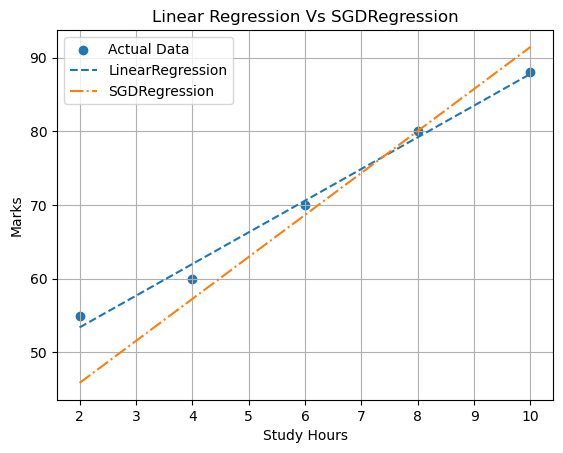

In [14]:
#Visualize the Data and Best Fit Line
plt.scatter(hours, marks, label="Actual Data")

plt.plot(hours, pred_marks, label="LinearRegression", linestyle="--")
plt.plot(hours, pred_sgd, label="SGDRegression", linestyle="-.")

plt.xlabel("Study Hours")
plt.ylabel("Marks")
plt.title("Linear Regression Vs SGDRegression")
plt.legend()
plt.grid(True)
plt.show()

### Summary
In this notebook, without any manual formulas, you:

Used LinearRegression to get a best fit line
1. Computed the Mean Squared Error (MSE) using mean_squared_error
2. Used SGDRegressor, which relies on gradient descent internally
3. Saw that both methods give similar lines and similar MSE values

The key idea:

1. Cost function (MSE) tells us how good or bad a line is
2. Gradient descent (inside SGDRegressor) is one way to search for parameters that reduce this cost


### Module 10 – Part 03: Regression Evaluation Metrics (R², MAE, RMSE)

### Step 1: Import Libraries

In [1]:
#Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Step 2: Create Dataset

In [2]:
#Create Dataset
hours = np.array([2, 4, 6, 8, 10]).reshape(-1,1)
marks = np.array([55, 60, 70, 80, 88])
hours, marks

(array([[ 2],
        [ 4],
        [ 6],
        [ 8],
        [10]]),
 array([55, 60, 70, 80, 88]))

### Step 3: Fit Linear Regression

In [4]:
#Fit Linear Regression
model = LinearRegression()
model.fit(hours, marks)
pred = model.predict(hours)
print(pred)

[53.4 62.  70.6 79.2 87.8]


### Step 4: Compute Metrics

In [5]:
# Compute Metrics 
mae = mean_absolute_error(marks, pred) 
mse = mean_squared_error(marks, pred) 
rmse = np.sqrt(mse) 
r2 = r2_score(marks, pred)

### Step 5: Print Results

In [6]:
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)
print("R2: ", r2) 

MAE:  1.040000000000002
MSE:  1.5200000000000011
RMSE:  1.2328828005937957
R2:  0.9898286937901499


### Step 6: Visualizing the Fit

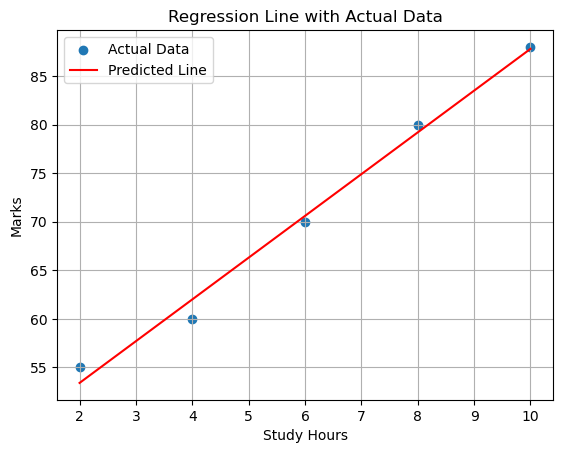

In [7]:
#Visualizing the Fit
plt.scatter(hours, marks, label="Actual Data")
plt.plot(hours, pred, color="red", label="Predicted Line")

plt.xlabel("Study Hours")
plt.ylabel("Marks")
plt.title("Regression Line with Actual Data")
plt.legend()
plt.grid(True)
plt.show()

### Summary

1. MAE: average error
2. RMSE: punishes large errors
3. R²: variance explained